In [58]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [59]:
df=pd.read_csv('/content/Market+Risk+Dataset.csv')

In [60]:
df

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...,...
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14


In [61]:
df.columns

Index(['Date', 'Infosys', 'Indian Hotel', 'Mahindra & Mahindra', 'Axis Bank',
       'SAIL', 'Shree Cement', 'Sun Pharma', 'Jindal Steel', 'Idea Vodafone',
       'Jet Airways'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian Hotel         314 non-null    int64 
 3   Mahindra & Mahindra  314 non-null    int64 
 4   Axis Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree Cement         314 non-null    int64 
 7   Sun Pharma           314 non-null    int64 
 8   Jindal Steel         314 non-null    int64 
 9   Idea Vodafone        314 non-null    int64 
 10  Jet Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [63]:
df['Date'] = pd.to_datetime(df['Date'])

In [64]:
df

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,2014-03-31,264,69,455,263,68,5543,555,298,83,278
1,2014-07-04,257,68,458,276,70,5728,610,279,84,303
2,2014-04-14,254,68,454,270,68,5649,607,279,83,280
3,2014-04-21,253,68,488,283,68,5692,604,274,83,282
4,2014-04-28,256,65,482,282,63,5582,611,238,79,243
...,...,...,...,...,...,...,...,...,...,...,...
309,2020-02-03,729,120,469,658,33,23110,401,146,3,22
310,2020-09-03,634,114,427,569,30,21308,384,121,6,18
311,2020-03-16,577,90,321,428,27,18904,365,105,3,16
312,2020-03-23,644,75,293,360,21,17666,338,89,3,14


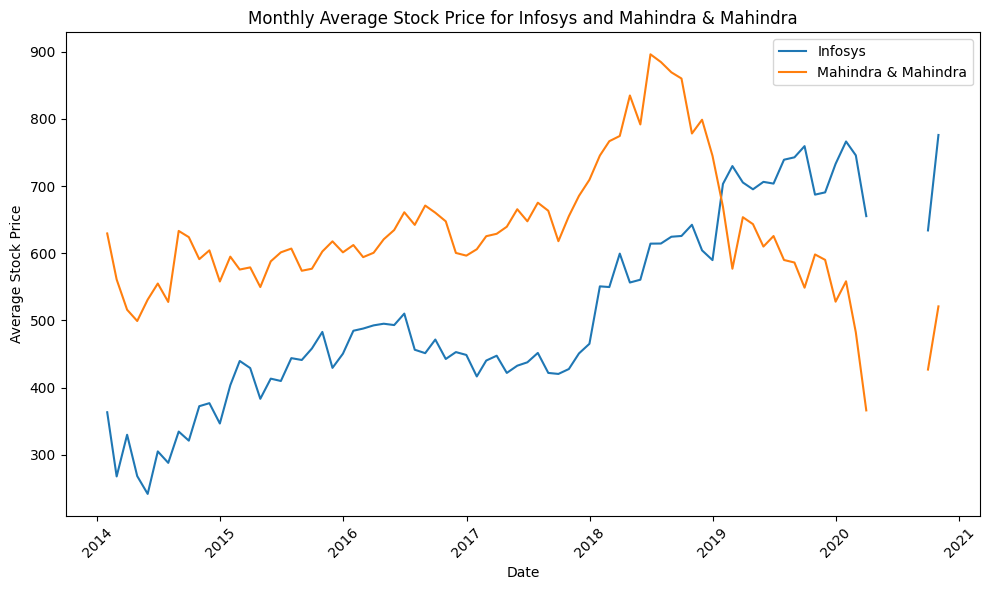

In [65]:
# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data from weekly to monthly and take the mean
df_monthly = df.resample('M').mean()

# Plot stock prices for two specified stocks (Infosys and Mahindra & Mahindra)
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Infosys'], label='Infosys')
plt.plot(df_monthly.index, df_monthly['Mahindra & Mahindra'], label='Mahindra & Mahindra')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.title('Monthly Average Stock Price for Infosys and Mahindra & Mahindra')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
weekly_returns_df = df.pct_change()

# Print the weekly returns DataFrame
weekly_returns_df

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
Date,,,,,,,,,,
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-04,-0.026515,-0.014493,0.006593,0.049430,0.029412,0.033375,0.099099,-0.063758,0.012048,0.089928
2014-04-14,-0.011673,0.000000,-0.008734,-0.021739,-0.028571,-0.013792,-0.004918,0.000000,-0.011905,-0.075908
2014-04-21,-0.003937,0.000000,0.074890,0.048148,0.000000,0.007612,-0.004942,-0.017921,0.000000,0.007143
2014-04-28,0.011858,-0.044118,-0.012295,-0.003534,-0.073529,-0.019325,0.011589,-0.131387,-0.048193,-0.138298
...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.009695,-0.104478,0.030769,-0.055954,-0.083333,0.023971,0.075067,-0.051948,-0.250000,-0.120000
2020-09-03,-0.130316,-0.050000,-0.089552,-0.135258,-0.090909,-0.077975,-0.042394,-0.171233,1.000000,-0.181818
2020-03-16,-0.089905,-0.210526,-0.248244,-0.247803,-0.100000,-0.112821,-0.049479,-0.132231,-0.500000,-0.111111


Volatilty

In [67]:
volatility = weekly_returns_df.std()
volatility

Infosys                0.034910
Indian Hotel           0.046914
Mahindra & Mahindra    0.039029
Axis Bank              0.045018
SAIL                   0.062899
Shree Cement           0.040192
Sun Pharma             0.044616
Jindal Steel           0.075079
Idea Vodafone          0.110075
Jet Airways            0.096473
dtype: float64

In [68]:
import pandas as pd

# Calculate the mean of returns for each stock
mean_returns = weekly_returns_df.mean()
mean_returns

Infosys                0.003409
Indian Hotel           0.001369
Mahindra & Mahindra   -0.000717
Axis Bank              0.002201
SAIL                  -0.001521
Shree Cement           0.004487
Sun Pharma            -0.000451
Jindal Steel          -0.001313
Idea Vodafone         -0.005080
Jet Airways           -0.004805
dtype: float64

In [71]:
# Calculate daily price changes
daily_changes = weekly_returns_df.diff()

# Separate daily gains and losses
daily_gains = daily_changes[daily_changes > 0].fillna(0)
daily_losses = -daily_changes[daily_changes < 0].fillna(0)

# Calculate average gains and losses over a specified period (e.g., 14 days)
period = 14
avg_gains = daily_gains.rolling(window=period).mean()
avg_losses = daily_losses.rolling(window=period).mean()

# Calculate relative strength (RS)
rs = avg_gains / avg_losses

# Calculate RSI
rsi = 100 - (100 / (1 + rs))

rsi

,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
Date,,,,,,,,,,
2014-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-02-03,50.610741,43.857050,53.703921,44.711530,46.456607,49.361698,55.786064,45.542900,45.927075,47.037553
2020-09-03,35.844803,47.456853,47.204575,41.915207,47.181454,47.367799,50.300863,48.852635,61.576626,44.954619
2020-03-16,42.390887,39.921380,37.415720,28.842728,41.577637,43.157624,44.779700,46.307053,45.703764,47.764228


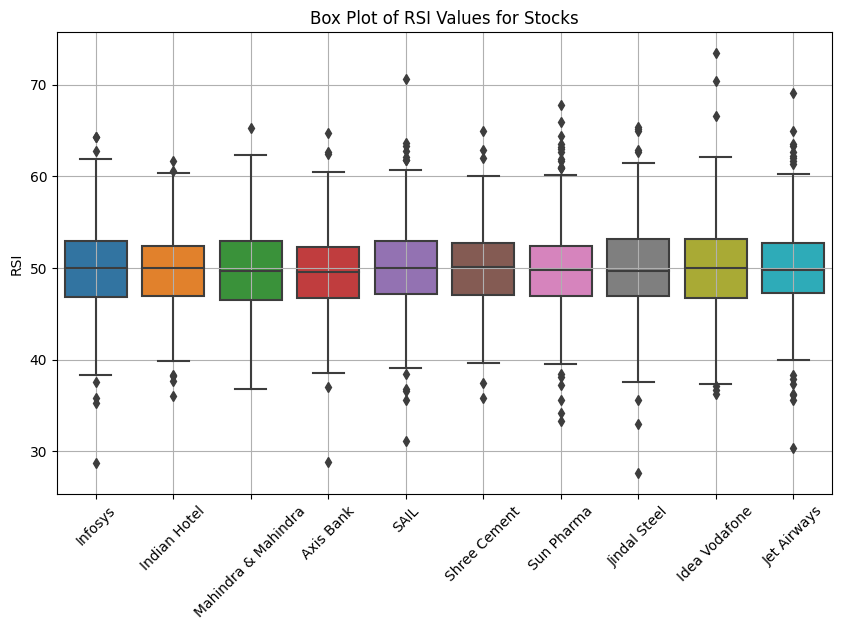

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rsi)
plt.title('Box Plot of RSI Values for Stocks')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

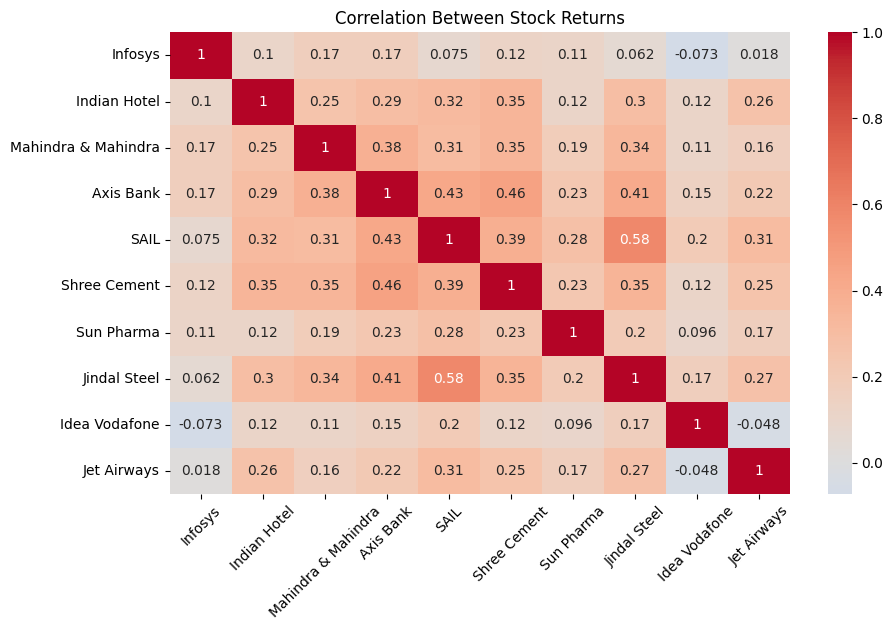

In [73]:
correlation_matrix = weekly_returns_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Stock Returns')
plt.xticks(rotation=45)
plt.show()

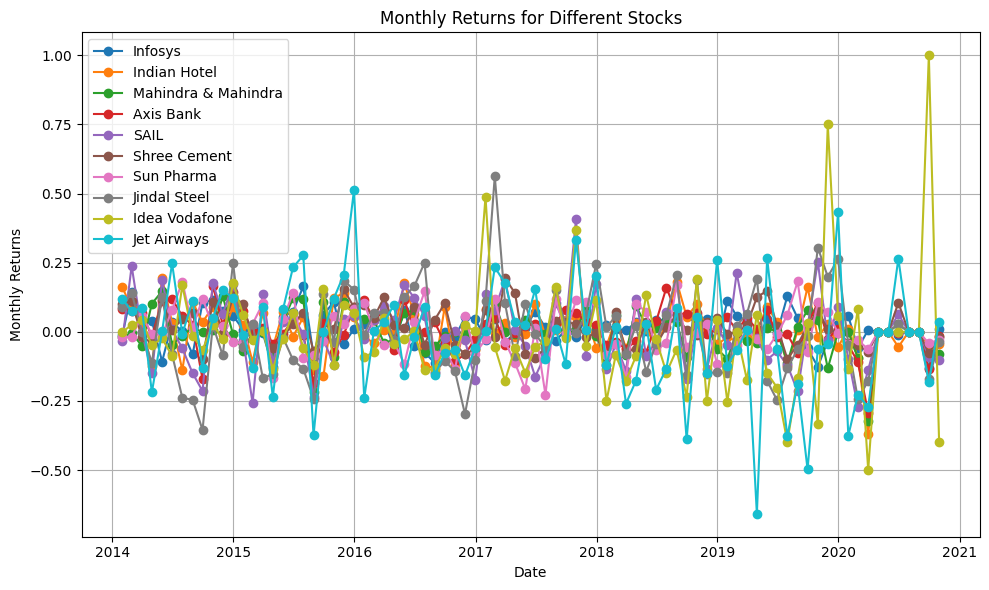

In [74]:
# Convert to monthly data
monthly_returns_df = weekly_returns_df.resample('M').sum()

# Plot the monthly returns data
plt.figure(figsize=(10, 6))

for column in monthly_returns_df.columns:
    plt.plot(monthly_returns_df.index, monthly_returns_df[column], marker='o', label=column)

plt.xlabel('Date')
plt.ylabel('Monthly Returns')
plt.title('Monthly Returns for Different Stocks')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [75]:
means = df.mean(axis=0)  # Calculate means for each stock column
std_devs = df.std(axis=0)  # Calculate standard deviations for each stock column

# Print means and standard deviations
print("Mean values for all stocks:")
print(means)

print("\nStandard deviations for all stocks:")
print(std_devs)

Mean values for all stocks:
Infosys                  511.340764
Indian Hotel             114.560510
Mahindra & Mahindra      636.678344
Axis Bank                540.742038
SAIL                      59.095541
Shree Cement           14806.410828
Sun Pharma               633.468153
Jindal Steel             147.627389
Idea Vodafone             53.713376
Jet Airways              372.659236
dtype: float64

Standard deviations for all stocks:
Infosys                 135.952051
Indian Hotel             22.509732
Mahindra & Mahindra     102.879975
Axis Bank               115.835569
SAIL                     15.810493
Shree Cement           4288.275085
Sun Pharma              171.855893
Jindal Steel             65.879195
Idea Vodafone            31.248985
Jet Airways             202.262668
dtype: float64


In [84]:
data = {
    "Mean": means,
    "standard_deviation": std_devs,
    "Mean_return": mean_returns,
    "volatility": volatility
}

summary_df = pd.DataFrame(data)
summary_df

,Mean,standard_deviation,Mean_return,volatility
Infosys,511.340764,135.952051,0.003409,0.034910
Indian Hotel,114.560510,22.509732,0.001369,0.046914
Mahindra & Mahindra,636.678344,102.879975,-0.000717,0.039029
Axis Bank,540.742038,115.835569,0.002201,0.045018
SAIL,59.095541,15.810493,-0.001521,0.062899
Shree Cement,14806.410828,4288.275085,0.004487,0.040192
Sun Pharma,633.468153,171.855893,-0.000451,0.044616
Jindal Steel,147.627389,65.879195,-0.001313,0.075079
Idea Vodafone,53.713376,31.248985,-0.005080,0.110075
Jet Airways,372.659236,202.262668,-0.004805,0.096473


In [85]:
summary_df['Coefficient_of_Variation'] = summary_df['volatility'] / summary_df['Mean_return']

In [86]:
summary_df = summary_df.reset_index(drop=False)

In [87]:
summary_df.rename(columns={'index': 'Stocks'}, inplace=True)

In [88]:
summary_df

,Stocks,Mean,standard_deviation,Mean_return,volatility,Coefficient_of_Variation
0,Infosys,511.340764,135.952051,0.003409,0.034910,10.239930
1,Indian Hotel,114.560510,22.509732,0.001369,0.046914,34.275954
2,Mahindra & Mahindra,636.678344,102.879975,-0.000717,0.039029,-54.419528
3,Axis Bank,540.742038,115.835569,0.002201,0.045018,20.449478
4,SAIL,59.095541,15.810493,-0.001521,0.062899,-41.341561
5,Shree Cement,14806.410828,4288.275085,0.004487,0.040192,8.958331
6,Sun Pharma,633.468153,171.855893,-0.000451,0.044616,-99.028093
7,Jindal Steel,147.627389,65.879195,-0.001313,0.075079,-57.192473
8,Idea Vodafone,53.713376,31.248985,-0.005080,0.110075,-21.668942
9,Jet Airways,372.659236,202.262668,-0.004805,0.096473,-20.078575


In [97]:
filtered_sorted = summary_df[(summary_df["Mean"] > 0) & (summary_df["Coefficient_of_Variation"] > 0)].sort_values("Coefficient_of_Variation")

filtered_sorted

,Stocks,Mean,standard_deviation,Mean_return,volatility,Coefficient_of_Variation
5,Shree Cement,14806.410828,4288.275085,0.004487,0.040192,8.958331
0,Infosys,511.340764,135.952051,0.003409,0.034910,10.239930
3,Axis Bank,540.742038,115.835569,0.002201,0.045018,20.449478
1,Indian Hotel,114.560510,22.509732,0.001369,0.046914,34.275954


In [90]:
new=summary_df[['Stocks','Mean','standard_deviation']]

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

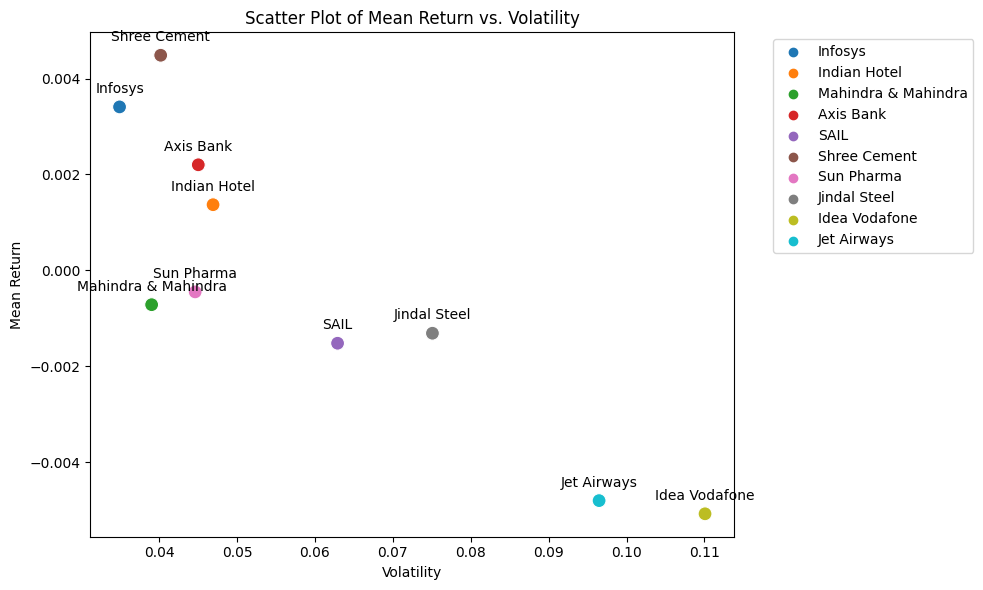

In [123]:
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=stats_df, x='Volatality', y='Mean_return', hue='Stocks', s=100)

# Set labels and title
plt.xlabel('Volatility')
plt.ylabel('Mean Return')
plt.title('Scatter Plot of Mean Return vs. Volatility')

# Add annotations
for row in stats_df.itertuples():
    plt.annotate(row.Stocks, (row.Volatality, row.Mean_return), textcoords="offset points", xytext=(0,10), ha='center')



# Show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

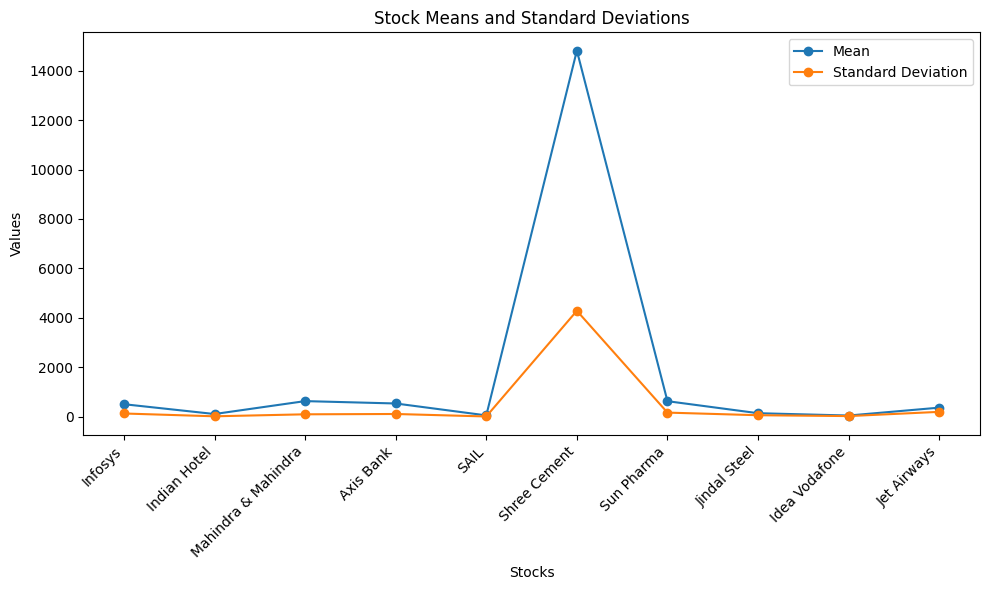

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(stats_df['Stocks'], stats_df['Mean'], marker='o', label='Mean')
plt.xticks(rotation=45, ha='right')

# Create a line plot for Standard Deviation
plt.plot(stats_df['Stocks'], stats_df['Standard Deviation'], marker='o', label='Standard Deviation')

plt.xlabel('Stocks')
plt.ylabel('Values')
plt.title('Stock Means and Standard Deviations')
plt.legend()
plt.tight_layout()
plt.show()

In [91]:
new

,Stocks,Mean,standard_deviation
0,Infosys,511.340764,135.952051
1,Indian Hotel,114.560510,22.509732
2,Mahindra & Mahindra,636.678344,102.879975
3,Axis Bank,540.742038,115.835569
4,SAIL,59.095541,15.810493
5,Shree Cement,14806.410828,4288.275085
6,Sun Pharma,633.468153,171.855893
7,Jindal Steel,147.627389,65.879195
8,Idea Vodafone,53.713376,31.248985
9,Jet Airways,372.659236,202.262668


<Axes: xlabel='standard_deviation', ylabel='Mean'>

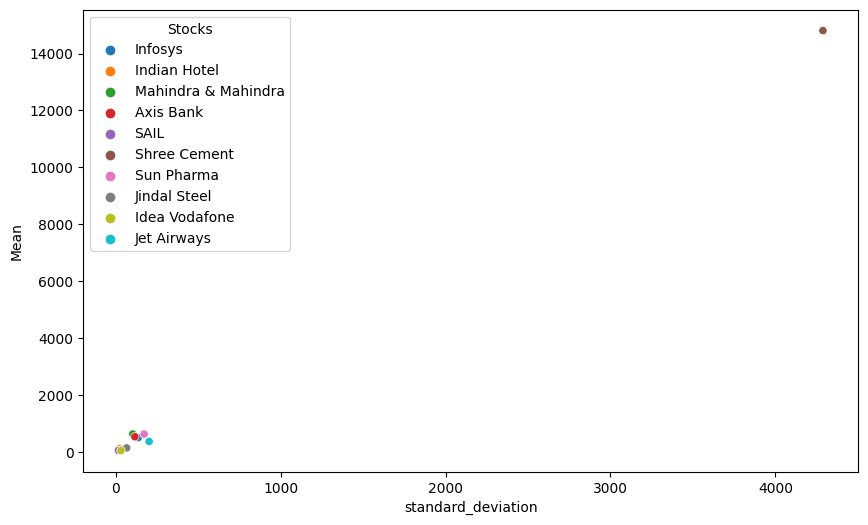

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='standard_deviation', y='Mean', hue='Stocks', data=new)
